<a href="https://colab.research.google.com/github/mhaletoki/MA22C025_2023_PL/blob/main/Assignments/Assignment_14/OvarianCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


data = load_breast_cancer()

X_dat = data.data  # Features
y_dat = data.target  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_dat, y_dat, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=30)  # Specify the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


**Task 1**

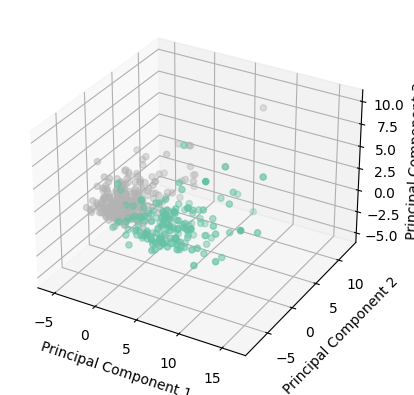

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the first three principal components
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap=sns.color_palette("Set2", as_cmap=True))
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Show the plot
plt.show()

**Task 2**

In [4]:
import numpy as np

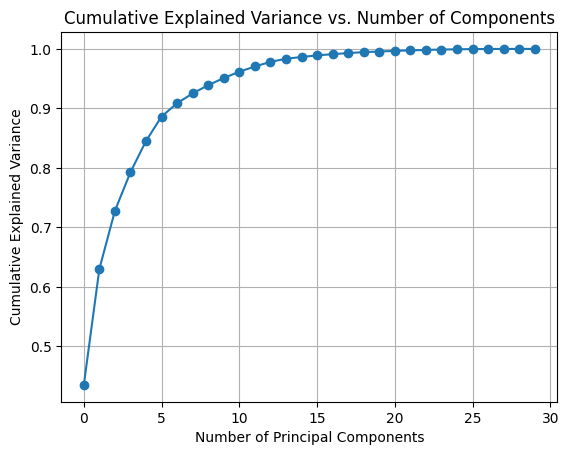

In [8]:
explained_var = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_var = np.cumsum(explained_var)

# Plot the cumulative explained variance
plt.plot(cumulative_var, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)



In [16]:
n_components_95 = np.where(cumulative_var >= 0.95)[0][0] + 1


print("Number of dimensions needed to keep 95% of the variance:", n_components_95)
print("Percentage of variance retained with 3 dimensions:", cumulative_var[2])
print("Percentage of variance lost when reducing from 4000 to 3 dimensions:", 1 - cumulative_var[2])


Number of dimensions needed to keep 95% of the variance: 10
Percentage of variance retained with 3 dimensions: 0.7278430734090061
Percentage of variance lost when reducing from 4000 to 3 dimensions: 0.2721569265909939


In [6]:
X_train.shape

(455, 30)